In [33]:
import pandas as pd 
titanic_dataset = pd.read_csv("Titanic-Dataset.circ")
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


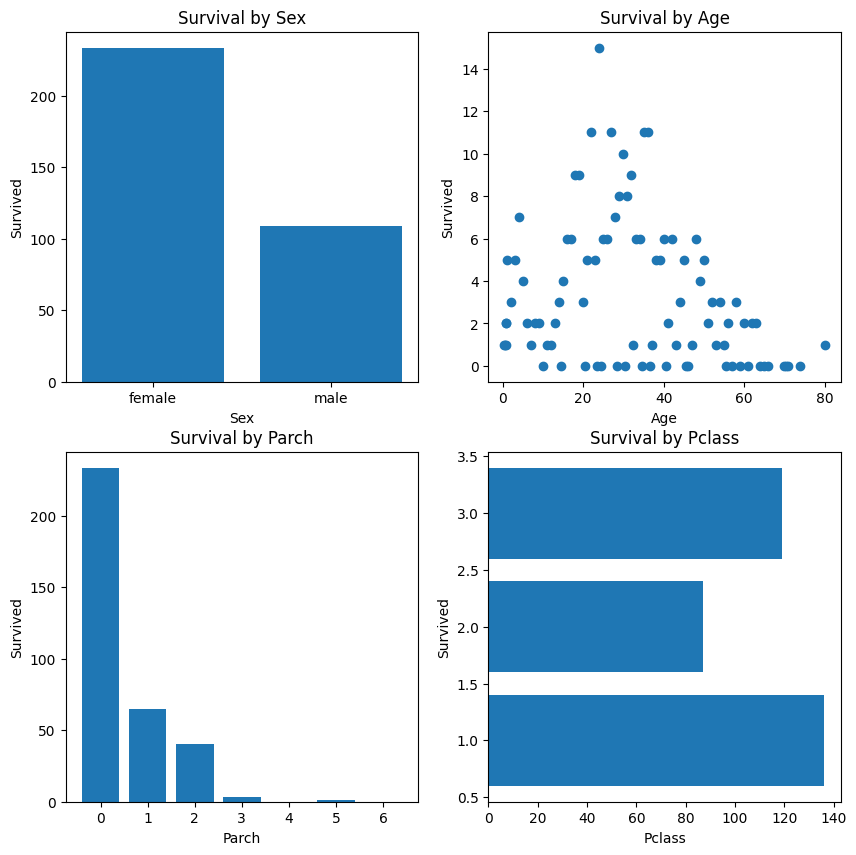

In [34]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax1.bar(titanic_dataset.groupby("Sex").sum()["Survived"].index, titanic_dataset.groupby("Sex").sum()["Survived"])
ax1.set(title="Survival by Sex", xlabel="Sex", ylabel="Survived")
ax2.scatter(titanic_dataset.groupby("Age").sum()["Survived"].index, titanic_dataset.groupby("Age").sum()["Survived"])
ax2.set(title="Survival by Age", xlabel="Age", ylabel="Survived")
ax3.bar(titanic_dataset.groupby("Parch").sum().index, titanic_dataset.groupby("Parch").sum()["Survived"])
ax3.set(title="Survival by Parch", xlabel="Parch", ylabel="Survived")
ax4.barh(titanic_dataset.groupby("Pclass").sum()["Survived"].index, titanic_dataset.groupby("Pclass").sum()["Survived"])
ax4.set(title="Survival by Pclass", xlabel="Pclass", ylabel="Survived")
fig.savefig("titanic_visuals.png");


In [35]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
titanic_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [39]:
categorical_feautures = ["Cabin","Embarked","Sex","Ticket"]
numerical_features = ["Parch","Pclass","SibSp","Fare", "Age"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_feautures)
    ])

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [41]:
X = titanic_dataset.drop(["Survived","PassengerId","Name"], axis=1)
y = titanic_dataset["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model = {
    "LogisticRegression" : LogisticRegression(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "XGBClassifier" : XGBClassifier()
}
results = {}
for modelName, model in model.items():
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                          ("model", model)])
    model_pipeline.fit(X_train, y_train)
    results[modelName] = model_pipeline.score(X_test, y_test)
print(results)

c:\Users\User\Desktop\Ai_Exercises\titanic-survival-prediction\venv-titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8212290502793296, 'RandomForestClassifier': 0.8212290502793296, 'XGBClassifier': 0.7988826815642458}


In [43]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
model_pipeline = Pipeline([("preprocessor", preprocessor),
                          ("model", model)])
cv_scores = cross_val_score(model_pipeline, X, y, cv=5)
print(cv_scores)
print(f"Average CV score: {cv_scores.mean()}")

c:\Users\User\Desktop\Ai_Exercises\titanic-survival-prediction\venv-titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\Desktop\Ai_Exercises\titanic-survival-prediction\venv-titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to sca

[0.81564246 0.79213483 0.79775281 0.79775281 0.82022472]
Average CV score: 0.8047015253279769


c:\Users\User\Desktop\Ai_Exercises\titanic-survival-prediction\venv-titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\Desktop\Ai_Exercises\titanic-survival-prediction\venv-titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to sca

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

def evaluate_model(model_pipeline, X_train, X_test, y_train, y_test):
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }
def plot_conf_mat(model_eval):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(model_eval["confusion_matrix"],annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()


In [45]:
from sklearn.model_selection import GridSearchCV
model_pipeline.fit(X_train, y_train)
# Define hyperparameter grid
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga']
}
print(model_pipeline.get_params().keys())


# Run GridSearchCV
grid = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Print results
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)
print("Test Accuracy:", grid.score(X_test, y_test))


dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessor', 'model', 'preprocessor__force_int_remainder_cols', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__transform_input', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__keep_empty_features', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__transform_input', 'preprocessor__cat__verbose', 'preprocessor__cat__imputer', 'preprocessor__cat__onehot', 'preprocesso

c:\Users\User\Desktop\Ai_Exercises\titanic-survival-prediction\venv-titanic\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.8202501723628485
Test Accuracy: 0.8212290502793296


In [46]:
model_pipeline = grid.best_estimator_
model_pipeline.fit(X_train, y_train)
print(f"Test Accuracy after hyperparameter tuning: {model_pipeline.score(X_test, y_test)}")

Test Accuracy after hyperparameter tuning: 0.8212290502793296


Model Accuracy: 0.8212290502793296
Model Precision: 0.8181818181818182
Model Recall: 0.7297297297297297
Model F1 Score: 0.7714285714285715


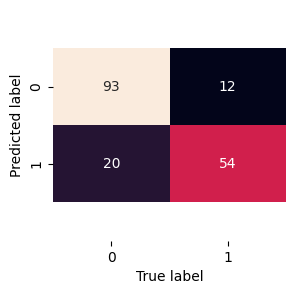

In [47]:
model_eval = evaluate_model(model_pipeline, X_train, X_test, y_train, y_test)
print(f"Model Accuracy: {model_eval['accuracy']}")
print(f"Model Precision: {model_eval['precision']}")
print(f"Model Recall: {model_eval['recall']}")
print(f"Model F1 Score: {model_eval['f1']}")
plot_conf_mat(model_eval)